In [79]:
#Import all the necessary modules
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import preprocessing

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn import metrics

import seaborn as sns
import matplotlib.pyplot as plt 

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
park_df=pd.read_csv('parkinsons.data.csv')

In [3]:
# Checking the number of rows and columns
park_df.shape

(195, 24)

In [4]:
# Checking the data type for each attribute
park_df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

    # All the attributes are numercial in nature and "status" is the target varibale where 0 represents those who do not have parkinson's disease where as 1 represents those who have parkinsonson's.

In [5]:
# checking the head of the data
park_df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
# Checking for missing values

park_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [7]:
park_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


1    147
0     48
Name: status, dtype: int64


Text(0,0.5,'Frequency')

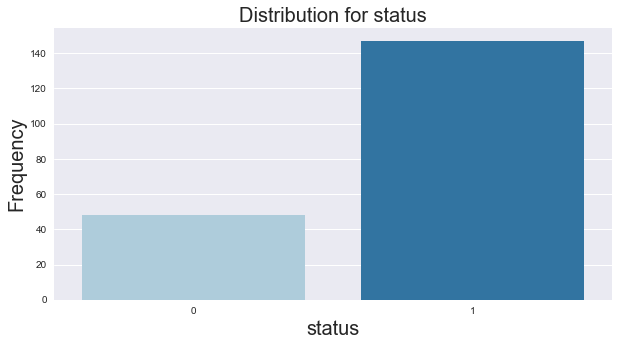

In [8]:
# Checking the distrbution of the dependent vriable
print(park_df['status'].value_counts())
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(park_df['status'], palette= "Paired")
plt.title('Distribution for status', fontsize = 20)
plt.xlabel('status', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)

    # There's a huge imbalance in the dependent varibale and this could create a bias in the model unless treated. However,  in the assignment, there is no requirement of the class imbalance treatment, we will proceed as is

In [9]:
corr = park_df.corr()

Text(0.5,1,'Correlation matrix')

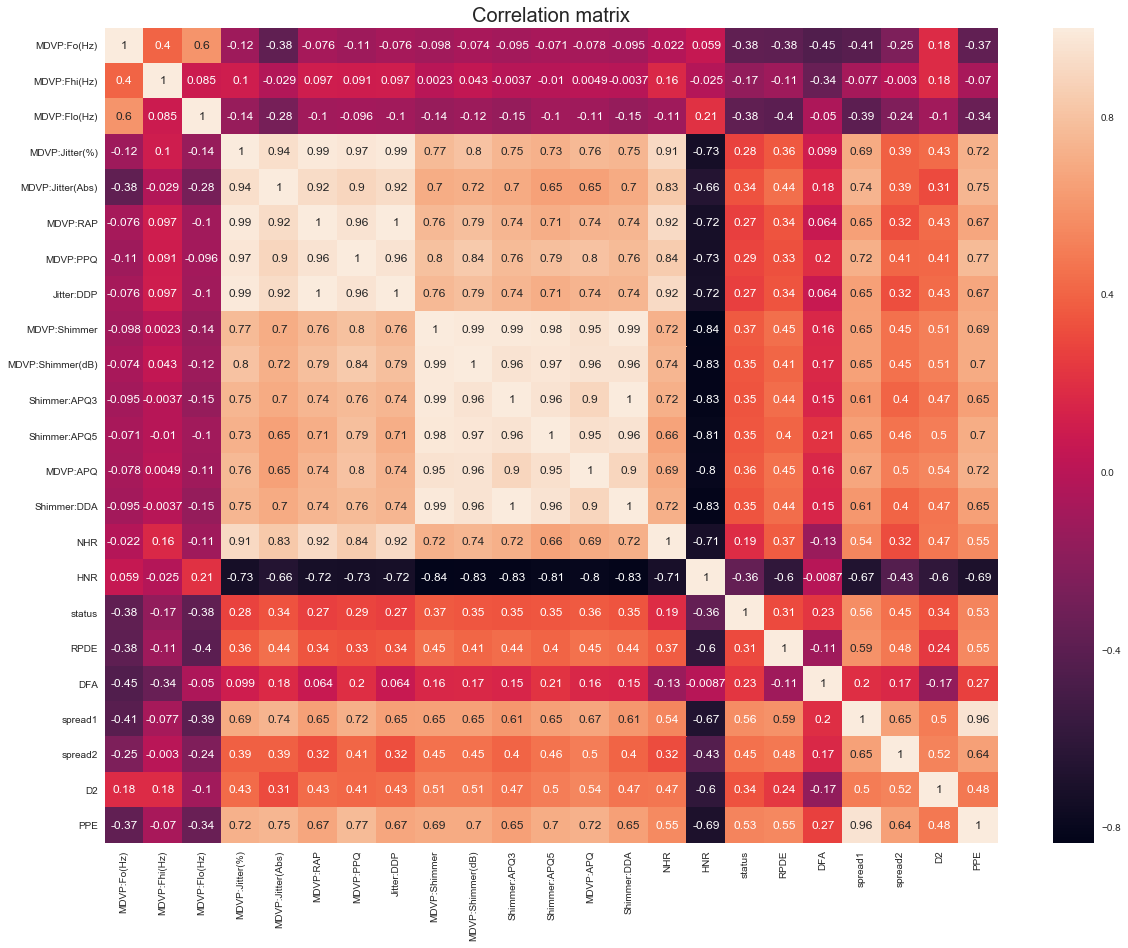

In [10]:
# Checking correlation matrix for multicolinearity

sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(corr, annot= True)
plt.title('Correlation matrix', fontsize = 20)

### Variables analysis 

        # MDVP:Jitter(%) has high correlation with other varibales. showing the relation between MDVP:Jitter(%) and other     variables below

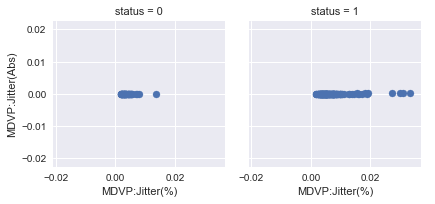

In [23]:

g = sns.FacetGrid(park_df, col="status")
g.map(plt.scatter, "MDVP:Jitter(%)", "MDVP:Jitter(Abs)")
g.add_legend();

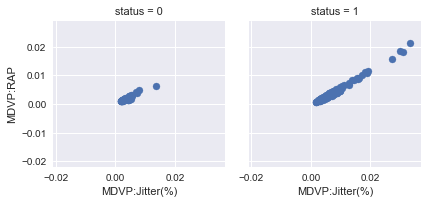

In [24]:

g = sns.FacetGrid(park_df, col="status")
g.map(plt.scatter, "MDVP:Jitter(%)", "MDVP:RAP")
g.add_legend();

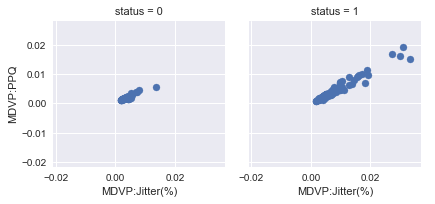

In [25]:

g = sns.FacetGrid(park_df, col="status")
g.map(plt.scatter, "MDVP:Jitter(%)", "MDVP:PPQ")
g.add_legend();

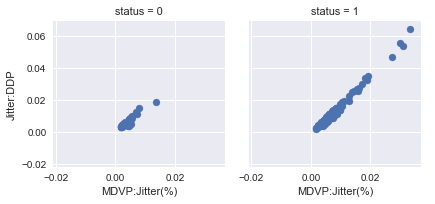

In [26]:

g = sns.FacetGrid(park_df, col="status")
g.map(plt.scatter, "MDVP:Jitter(%)", "Jitter:DDP")
g.add_legend();

      # MDVP:Shimmer has high correlation with other varibales. Showing the relation between MDVP:Shimmer and other varibales  below

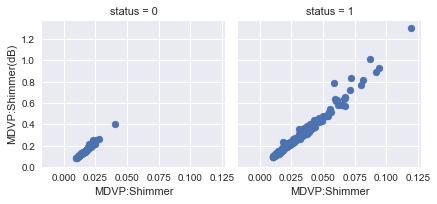

In [28]:
g = sns.FacetGrid(park_df, col="status")
g.map(plt.scatter, "MDVP:Shimmer", "MDVP:Shimmer(dB)")
g.add_legend();

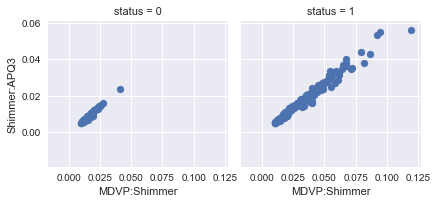

In [29]:
g = sns.FacetGrid(park_df, col="status")
g.map(plt.scatter, "MDVP:Shimmer", "Shimmer:APQ3")
g.add_legend();

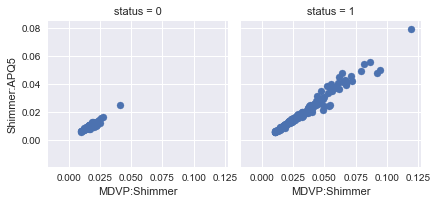

In [30]:
g = sns.FacetGrid(park_df, col="status")
g.map(plt.scatter, "MDVP:Shimmer", "Shimmer:APQ5")
g.add_legend();

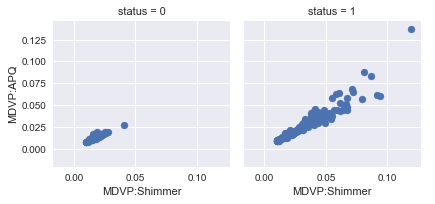

In [32]:
g = sns.FacetGrid(park_df, col="status")
g.map(plt.scatter, "MDVP:Shimmer", "MDVP:APQ")
g.add_legend();

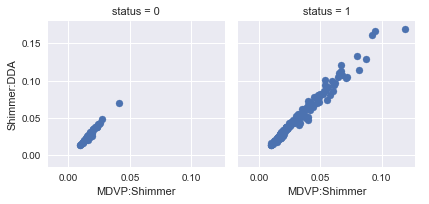

In [31]:
g = sns.FacetGrid(park_df, col="status")
g.map(plt.scatter, "MDVP:Shimmer", "Shimmer:DDA")
g.add_legend();

###### Also from the correlation matrix, we can notice the following observations;

###### NHR has a strong positive correlation with the following varibales; 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP'

###### HNR has a strong negative correlation with the following variables;'MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ', 'Shimmer:DDA'

In [35]:
# Making the parkinson's data into Feature set (includes independent variables) and label (the dependent variable)

features = park_df.drop(['status','name'],axis=1) # 'name' will have no effect on 'status'
label = park_df['status']

In [36]:
# Let's normalize the data using the minmax scaler to bring the feature variables within the range -1 to 1

scaler=MinMaxScaler((-1,1))
X =scaler.fit_transform(features)
y = label

In [44]:
# Splitting of dataset into train and test set

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=100)

In [108]:
# Creating a Decision tree model using entropy

dt_model = DecisionTreeClassifier(criterion='entropy',max_depth = 10,min_samples_leaf=15,)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [109]:
y_pred_dt_train = dt_model.predict(X_train)
y_pred_dt_test = dt_model.predict(X_test)

In [110]:
# Printing the accuracy of the decision tree model
print('the accuracy of a decision tree using Entropy criterion on training dataset is %.2f'% accuracy_score(y_train, y_pred_dt_train))
print('the accuracy of a decision tree using Entropy criterion on testing dataset is %.2f'% accuracy_score(y_test, y_pred_dt_test))

the accuracy of a decision tree using Entropy criterion on training dataset is 0.90
the accuracy of a decision tree using Entropy criterion on testing dataset is 0.71


In [111]:
conf_matrix_dt = confusion_matrix(y_test,y_pred_dt_test)
print(conf_matrix_dt)

[[ 7  5]
 [12 35]]


In [112]:
print(metrics.classification_report(y_test,y_pred_dt_test))

             precision    recall  f1-score   support

          0       0.37      0.58      0.45        12
          1       0.88      0.74      0.80        47

avg / total       0.77      0.71      0.73        59



In [113]:
# Regularizing the dt_model

# Creating the parameter grid for gridsearrch cv

param_grid = {
    'max_depth': [5,10,15],
    'min_samples_leaf': [5,10,15],
    
    }

n_folds = 3

# Instantiating the grid search on dt_model
grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, 
                          cv = n_folds, n_jobs = -1, verbose = 2)

In [114]:
# Fitting the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    4.1s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [5, 10, 15], 'min_samples_leaf': [5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [115]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

best accuracy 0.8529411764705882
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
{'max_depth': 10, 'min_samples_leaf': 5}


### Running the decision tree model with best parameters obtained from grid search.

In [117]:
# Creating a Decision tree model using best estimators

dt_model_regularized = DecisionTreeClassifier(criterion='entropy',max_depth = 10,min_samples_leaf=5)
dt_model_regularized.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [118]:
y_pred_dt_reg_train = dt_model_regularized.predict(X_train)
y_pred_dt_reg_test = dt_model_regularized.predict(X_test)

In [119]:
# Printing the accuracy of the regularized decision tree model
print('the accuracy of a decision tree using Entropy criterion on training dataset is %.2f'% accuracy_score(y_train, y_pred_dt_reg_train))
print('the accuracy of a decision tree using Entropy criterion on testing dataset is %.2f'% accuracy_score(y_test, y_pred_dt_reg_test))

the accuracy of a decision tree using Entropy criterion on training dataset is 0.94
the accuracy of a decision tree using Entropy criterion on testing dataset is 0.73


In [120]:
conf_matrix_dt_reg = confusion_matrix(y_test,y_pred_dt_reg_test)
print(conf_matrix_dt_reg)

[[ 7  5]
 [11 36]]


In [121]:
print(metrics.classification_report(y_test,y_pred_dt_reg_test))

             precision    recall  f1-score   support

          0       0.39      0.58      0.47        12
          1       0.88      0.77      0.82        47

avg / total       0.78      0.73      0.75        59



    # The decision tree model has improved slightly after using the best parameters from gridsearch

## Now creating a random forest model on the same data to check if there is a better performance than the decision tree model

In [122]:
# Creating a Decision tree model using entropy

rf_model = RandomForestClassifier(n_estimators=20,criterion='entropy',max_depth = 10,min_samples_leaf=15,)
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [123]:
y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf_test = rf_model.predict(X_test)

In [124]:
# Printing the accuracy of the random forest model
print('the accuracy of a random forest using Entropy criterion on training dataset is %.2f'% accuracy_score(y_train, y_pred_rf_train))
print('the accuracy of a random forest using Entropy criterion on testing dataset is %.2f'% accuracy_score(y_test, y_pred_rf_test))

the accuracy of a random forest using Entropy criterion on training dataset is 0.88
the accuracy of a random forest using Entropy criterion on testing dataset is 0.81


In [125]:
conf_matrix_rf = confusion_matrix(y_test,y_pred_rf_test)
print(conf_matrix_rf)

[[ 7  5]
 [ 6 41]]


In [126]:
print(metrics.classification_report(y_test,y_pred_rf_test))

             precision    recall  f1-score   support

          0       0.54      0.58      0.56        12
          1       0.89      0.87      0.88        47

avg / total       0.82      0.81      0.82        59



## Let's regularize the random forest model by passing the parameters used through grid search cross validation

In [133]:
# Regularizing the dt_model

# Creating the parameter grid for gridsearrch cv

param_grid = {
    
    'max_depth': [5,10,15,20],
    'min_samples_leaf': [5,10,15,20],
    'n_estimators': [40,50,60,70,80,90,100]
}
n_folds = 3

# Instantiating the grid search on dt_model
grid_search_rf = GridSearchCV(estimator = rf_model, param_grid = param_grid, 
                          cv = n_folds, n_jobs = -1, verbose = 2)

In [134]:
# Fitting the grid search to the data
grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 112 candidates, totalling 336 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 336 out of 336 | elapsed:   17.0s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [5, 10, 15, 20], 'min_samples_leaf': [5, 10, 15, 20], 'n_estimators': [40, 50, 60, 70, 80, 90, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [135]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search_rf.best_score_)
print(grid_search_rf.best_estimator_)
print(grid_search_rf.best_params_)

best accuracy 0.9044117647058824
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
{'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 60}


## Running the Random forest model with best parameters obtained from grid search.

In [136]:
# Creating a Random Forest model using best estimators

rf_model_regularized = RandomForestClassifier(n_estimators=60, criterion='entropy',max_depth = 10,min_samples_leaf=5)
rf_model_regularized.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [137]:
y_pred_rf_train_reg = rf_model_regularized.predict(X_train)
y_pred_rf_test_reg = rf_model_regularized.predict(X_test)

In [138]:
# Printing the accuracy of the regularized random forest model
print('the accuracy of a random forest using Entropy criterion on training dataset is %.2f'% accuracy_score(y_train, y_pred_rf_train_reg))
print('the accuracy of a random forest using Entropy criterion on testing dataset is %.2f'% accuracy_score(y_test, y_pred_rf_test_reg))

the accuracy of a random forest using Entropy criterion on training dataset is 0.99
the accuracy of a random forest using Entropy criterion on testing dataset is 0.83


In [139]:
conf_matrix_rf_reg = confusion_matrix(y_test,y_pred_rf_test_reg)
print(conf_matrix_rf_reg)

[[ 8  4]
 [ 6 41]]


In [140]:
print(metrics.classification_report(y_test,y_pred_rf_test_reg))

             precision    recall  f1-score   support

          0       0.57      0.67      0.62        12
          1       0.91      0.87      0.89        47

avg / total       0.84      0.83      0.84        59



## The f1 score for the random forest (0.84) is much improved as compared to the regularized decision tree model (0.75)

## The optimal number of trees that gives the best result for the Random forest model is 60